<a href="https://colab.research.google.com/github/mrinmoy-sadhukhan/AI_Flower/blob/main/Mahine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Install *Kaggle*

In [ ]:
!pip install -q kaggle
from google.colab import files


Load *Data*

In [ ]:
%cd /content/drive/My Drive/kaggle
!pwd

/content/drive/My Drive/kaggle
/content/drive/My Drive/kaggle


In [ ]:
import sys
sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'

In [ ]:
!ls

flowers-recognition.zip  kaggle.json  output  unzippeed_folder


In [ ]:
machine learning model

SyntaxError: ignored



> Indented block



In [ ]:
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile

from skimage.transform import resize
from sklearn.model_selection import train_test_split

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D 
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

sys.version

'3.6.9 (default, Oct  8 2020, 12:12:24) \n[GCC 8.4.0]'

In [ ]:
%cd /content/drive/My Drive/kaggle
!pwd

/content/drive/My Drive/kaggle
/content/drive/My Drive/kaggle


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/kaggle"

In [ ]:
# base_path = 'Dataset/flowers/'
base_path = 'unzippeed_folder/flowers/'
# daisy：菊花。 dandelion：蒲公英。 rose：玫瑰。 sunflower：向日葵。 tulip：郁金香。
categories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
!pip install mahotas

In [ ]:
# -----------------------------------
# GLOBAL FEATURE EXTRACTION
# -----------------------------------
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import cv2
import os
import h5py
import glob

# --------------------
# tunable-parameters
# --------------------
images_per_class = 80
fixed_size = tuple((256,256))
train_path = "unzippeed_folder/flowers"
h5_data = 'output/data.h5'
h5_labels = 'output/labels.h5'
scaler_path='output/scaler.save'
bins = 8


# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature


# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick


# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()


# get the training labels
train_labels = categories

# sort the training labels
train_labels.sort()
print(train_labels)

# empty lists to hold feature vectors and labels
global_features = []
labels = []

# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
   # for x in range(1, images_per_class + 1):
        # get the image file name
    #    file = dir + "/" + str(x) + ".jpg"
    paths=dir+"/*.jpg"
    print(paths)
    for file in glob.glob(paths):
        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        #print(image)
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick = fd_haralick(image)
        fv_histogram = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        #print(global_feature.shape)
        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)


    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le = LabelEncoder()
target = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print(rescaled_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))
joblib.dump(scaler,scaler_path)
h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
unzippeed_folder/flowers/daisy/*.jpg
[STATUS] processed folder: daisy
unzippeed_folder/flowers/dandelion/*.jpg
[STATUS] processed folder: dandelion
unzippeed_folder/flowers/rose/*.jpg
[STATUS] processed folder: rose
unzippeed_folder/flowers/sunflower/*.jpg
[STATUS] processed folder: sunflower
unzippeed_folder/flowers/tulip/*.jpg
[STATUS] processed folder: tulip
[STATUS] completed Global Feature Extraction...
[STATUS] feature vector size (4323, 532)
[STATUS] training Labels (4323,)
[STATUS] training labels encoded...
[[0.00000000e+00 1.70025730e-04 3.76921684e-03 ... 2.92230499e-01
  2.39117739e-01 8.91662187e-01]
 [2.64112412e-03 1.00026340e-03 2.93964386e-03 ... 2.92230499e-01
  2.39117234e-01 8.91662190e-01]
 [0.00000000e+00 0.00000000e+00 9.61889034e-05 ... 2.92227688e-01
  2.39239495e-01 8.91661568e-01]
 ...
 [2.12108565e-02 3.62069345e-02 5.60149857e-02 ... 2.92230346e-01
  2.39166131e-01 8.91661975e-01]
 [1.80833855e-02 3.70214

[STATUS] features shape: (4323, 532)
[STATUS] labels shape: (4323,)
[STATUS] training started...
[STATUS] splitted train and test data...
Train data  : (3890, 532)
Test data   : (433, 532)
Train labels: (3890,)
Test labels : (433,)
LR: 0.544216 (0.022676)
LDA: 0.514653 (0.014304)
KNN: 0.471722 (0.024149)
CART: 0.509512 (0.026586)
RF: 0.664010 (0.016097)
NB: 0.420823 (0.015681)
SVM: 0.547558 (0.025963)


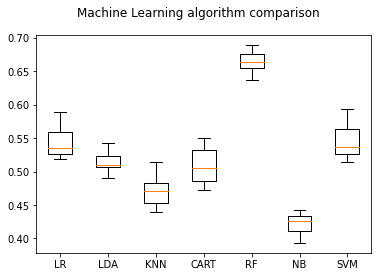

In [ ]:
# -----------------------------------
# TRAINING OUR MODEL
# -----------------------------------
import h5py
import mahotas
import numpy as np
import os
import glob
import cv2
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

# --------------------
# tunable-parameters
# --------------------
num_trees = 100
test_size = 0.10
seed = 9
train_path = "unzippeed_folder/flowers"
test_path = "test"
h5_data = 'output/data.h5'
h5_labels = 'output/labels.h5'
scoring = "accuracy"
fixed_size = tuple((256,256))
bins = 8
scaler_path = 'output/scaler.save'

# get the training labels
train_labels = categories

# sort the training labels
train_labels.sort()

if not os.path.exists(test_path):
    os.makedirs(test_path)

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))

# variables to hold the results and names
results = []
names = []
global_feature = []
# import the feature vector and trained labels
h5f_data = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()



In [ ]:
pwd

'/content/drive/My Drive/kaggle'

This part is to be used in flask

In [ ]:
import matplotlib.pyplot as plt

# create the model - Random Forests
clf = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)


# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature


# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick


# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()


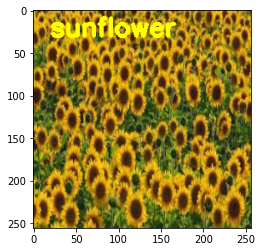

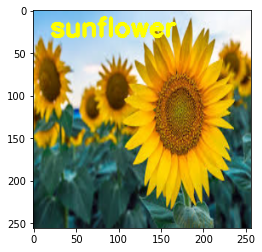

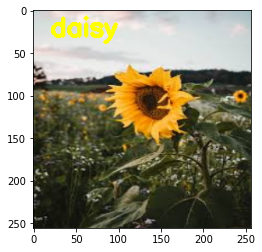

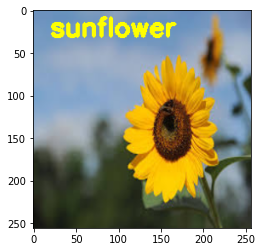

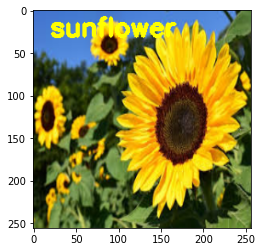

In [ ]:
for file in glob.glob('/content/drive/My Drive/kaggle/test/*jpg'):

  # read the image
  image = cv2.imread(file)

  # resize the image
  image = cv2.resize(image, fixed_size)

  ####################################
      # Global Feature extraction
      ####################################
  fv_hu_moments = fd_hu_moments(image)
  fv_haralick = fd_haralick(image)
  fv_histogram = fd_histogram(image)

      ###################################
      # Concatenate global features
      ###################################
  global_feature1 = []
  global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
  # print(np.array(global_feature).shape)
  global_feature1.append(global_feature)
  scaler = joblib.load(scaler_path)
  rescaled_feature = scaler.transform(global_feature1)
  #print(rescaled_feature)
      # predict label of test image
  prediction = clf.predict(rescaled_feature.reshape(1, -1))[0]
  #print(clf.predict(rescaled_feature))
  #print(train_labels[prediction])
      # show predicted label on image
  cv2.putText(image, train_labels[prediction], (20, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 3)

      # display the output image
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.show()